<!-- ENG -->
# Exercises in Fundamentals of Data Science ⑥

<!-- ENG -->
※Distribution or redistribution of these exercise materials without the copyright holder's permission is not permitted.

<!-- ENG -->
　The theme of today's exercises is **dimension reduction**.

　For example, if the data is $\boldsymbol{x} = \left[x_1, \dots, x_{10000}\right]$, which has 10,000 dimensions, it is naturally difficult to visually check how each data item is scattered or grouped.

　Dimension reduction is a useful way to **visualize data** by trying to somehow represent (or more accurately, "project") such high-dimensional data in a lower dimension (e.g., two dimensions).

<!-- ENG -->
- **DS6.0 | Difficulties in visualizing high-dimensional data**

- **DS6.1 | Review of principal component analysis (PCA)**

- **DS6.2 | Canonical correlation analysis (CCA)**

- **DS6.3 | Multidimensional scaling (MDS)**

- **DS6.4 | Combining dimension reduction and classification prediction** 



From DS6.1 to DS6.3, we will use these methods themselves to visualize the data. I would like you to check the contents of each method, paying attention to the characteristics of each method.



　DS6.4 also illustrates a different aspect of **data noise reduction** through dimension reduction.



<!-- ENG -->
## DS6.0 | Difficulties in visualizing high-dimensional data

<!-- ENG -->
　Before going into the explanation of the method, let’s briefly consider when dimension reduction is necessary. Here, I will explain the situation by using 300 handwritten character data items (digits data) that we also used in part 4 of this exercise.



In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

num_data = 300
d = datasets.load_digits()
X = d.data[:num_data]
y = d.target[:num_data]

<!-- ENG -->
　The digits data consists of 64-dimensional numerical values, and it is naturally difficult for humans to intuitively understand the distribution and cohesion of data with more than 4 dimensions. Therefore, we usually want to **convert the data into two-dimensional values in some way and display them**.



　For example, in the following case, let's look at the data distribution using the two axes of the 10th and 11th dimensions of the 64 dimensions.



In [ ]:
## Function for 2D visualization of handwritten character data
def plot_digits(X, y, n_labels=10, title=None):
  # plot X/y in 2-dimensions
  plt.figure(figsize=(5,5))

  # set color palette for plot
  color = [plt.cm.nipy_spectral(i/n_labels, 1) for i in range(n_labels)] 

  # plot by each label
  for i in range(n_labels):
    plt.scatter(X[y==i, 0], X[y==i, 1],
                color=color[i], marker=f"${i}$")
  plt.xlabel("1st axis")
  plt.ylabel("2nd axis")
  plt.title(title)
  plt.show()

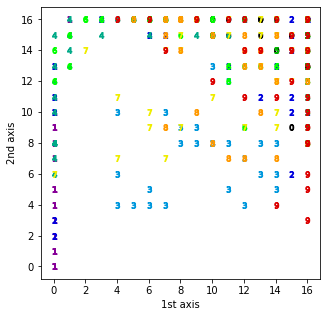

In [ ]:
# Draw using the 10th and 11th dimensions of all data (300 items)
plot_digits(X[:, [10,11]], y, n_labels=10)

<!-- ENG -->
　It is a good thing that the values are aligned like a grid because they only take integer values. However, unfortunately, you can see it is difficult to say that each character is neatly separated.

　

<!-- ENG -->
## DS6.1 | Review of principal component analysis (PCA)

<!-- ENG -->
　So far, we have learned that it is difficult to visualize high-dimensional data, but we have already learned one dimension reduction in this exercise. Principal component analysis (PCA), which we learned in the Exercises in Fundamentals of Data Science ④, was one of those, and was a linear transformation of data $\boldsymbol{x}_n$, such as a vector of length $K$, into a lower dimensional vector of dimension $r$.

　Now, let's actually do PCA and visualize the results. This time, we will specify `n_components=2` to visualize it in two dimensions.


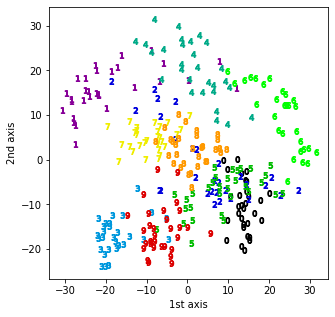

In [ ]:
# prepare PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2 components will be used
pca.fit(X) # obtain principal component
images_map = pca.transform(X) # transform input data using PCA

plot_digits(images_map, y, n_labels=10)

<!-- ENG -->
　Compared to the results we tried in DS6.0, we can see that we are able to compose chunks of each number.

<!-- ENG -->
　With PCA, by looking at the value of each principal component (eigenvector), we can check which explanatory variables are the main contributors and how much of the variance in the data is represented by the eigenvalues of each principal component. Let's take a look at the actual contribution of each component.

In [ ]:
import pandas as pd
pca = PCA(n_components=3).fit(X) # PCA, use 3 components

columns = range(64)
indexes = ["PC1", "PC2", "PC3"]
components = pca.components_ # get components from PCA result

print(pd.DataFrame(components, index=indexes, columns=columns))

               0         1         2   ...        61        62        63
PC1  2.913330e-18  0.000984  0.008866  ...  0.013298  0.049194  0.000278
PC2 -6.354556e-18 -0.023672 -0.255373  ...  0.026306  0.006144 -0.001254
PC3 -4.294286e-18  0.038710  0.215437  ... -0.234537 -0.034888 -0.000164

[3 rows x 64 columns]


---

<!-- ENG -->

##### Exercise DS6.1

　Complete the sentences below by filling in the two blanks [ A ] and [ B ] with the appropriate words and phrases, respectively.

![swiss_role](https://i.imgur.com/YDGNKRS.png)

<!-- ENG -->
**Figure DS6.1 | Swiss-roll data set**



<!-- ENG -->
```
In Part 4, we learned that PCA is a method of reducing the dimensionality 
so that the direction in which the data variance is maximized becomes the axis.
This is based on the assumption that the data is spread out in an elliptical fashion, 
and that two spatially distant points are very different data.
　On the other hand, there are cases where two spatially close points are very
different data. Figure DS6.1 is called the swiss-roll data set, which is the data 
obtained by bending the plane data into three dimensions. In the case of this data, 
it is more important to be based on "distance along the spread of data points"
rather than "spatial distance".
　It is known that PCA cannot properly reduce the dimensionality of data 
such as this swiss-roll data set, which has no [  A  ] relationship with 
each variable but for [  B  ] relationship data, and it becomes necessary 
to use other dimension reduction methods.
```


spatial distance

distance along the spread of data points

---

<!-- ENG -->
##### Exercise DS6.2
　For the swiss-roll data set such as the one shown in Exercise DS6.1, investigate and answer the dimension reduction methods that can separate the inside of the spiral from the outside of the spiral.


--------

<!-- ENG -->
## DS6.3 | Multidimensional scaling (MDS)

<!-- ENG -->
　**Multidimensional Scaling (MDS)** is another dimension reduction method other than PCA.

　PCA is a method of reducing the dimensionality of the data so as to preserve the spread of the entire data, while MDS is **a method of reducing the dimensionality of the data so as to reproduce the distance relationship between pairs of data as much as possible**. There are two types of MDS: Metric MDS and Nonmetric MDS, both of which **require only the dissimilarity, such as distance, of each data point**.

　Here, let's focus on Metric MDS. Metric MDS reduces the dimensionality so that the dissimilarity between data points is consistent before and after the transformation. To Express mathematically, it minimizes the difference between the dissimilarity $d_{ij}$ in the space before the projection and the dissimilarity $\|z_i - z_j\|$ after the projection. In other words, it is the same as optimization in the following formula.


$$
\min_{z_1, \ldots, z_n \in \mathbb{R}^r} \sum_{i, j}\left(d_{ij} - \|z_i - z_j\|\right)^2
$$


<!-- ENG -->
　In DS6.1 and DS6.2, we have used handwritten text data to explain this, but how can we define "image dissimilarity"? Here, we will again consider the image as a vector of numbers, and consider the Euclidean distance between two vectors of numbers.

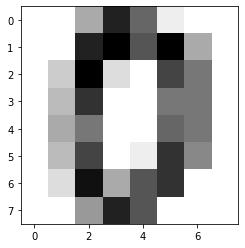

The figure is treated as a vector x =  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
image = d.images[0]
x = X[0]
plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()
print("The figure is treated as a vector x = ", x)

In [ ]:
import numpy as np

x1 = X[0]
x2 = X[1]
print("figure 1 =", x1)
print("figure 2 =", x2)

#Considering a sequence of numbers as a vector, the Euclidean distance can be calculated by np.linalg.norm(x1-x2)
print("The Euclidean distance of them :", np.linalg.norm(x1-x2))

figure 1 = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
figure 2 = [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
The Euclidean distance of them : 59.55669567731239


<!-- ENG -->
　Now, let's actually run Metric MDS in scikit-learn. Note that Metric MDS in scikit-learn uses the Euclidean distance as the dissimilarity by default when you input data.



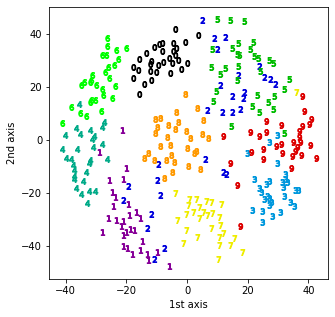

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, metric=True, random_state=0) # metric MDS
X_low = mds.fit_transform(X)

plot_digits(X_low, y, n_labels=10)

<!-- ENG -->
　MDS is an algorithm that contains random elements inside, and the result changes depending on the random number seed, `random_state`. Change the seed of the random number and see if the result changes.

<!-- ENG -->
　In this study, we focused on those that can be expressed as vectors in order to compare the results with PCA, but **MDS can be applied as long as the dissimilarity can be defined**. Therefore, it is possible to apply MDS by defining the dissimilarity such as an edit distance for a character string that cannot be represented by a vector.

<!-- ENG -->
## DS6.4 | Canonical correlation analysis (CCA)

<!-- ENG -->
　PCA and MDS are intended to represent **a large number of data of one type** in a low-dimensional space based on vectors representing the data and dissimilarities between the data.

　Canonical correlation analysis (CCA) is intended to represent a large number of **paired** data **in the same low-dimensional space**.

　In order to find a low-dimensional representation **common to $\boldsymbol{x}$ and $\boldsymbol{z}$** for two columns of data $(\boldsymbol{x}_1, \boldsymbol{z}_1), \ldots, (\boldsymbol{x}_n, \boldsymbol{z}_n)$, CCA solves the following optimization problem to obtain matrices $A$, $B$. (As handled in the following example, with CCA, the number of dimensions of the two types of data $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal.)

$$
\min_{A,B}\frac{1}{n} \sum_{i=1}^{n}\|A^T x_i - B^T z_i \|^2 \ \ \ \
{\rm s.t. }\ \ 
\mathbb{V}[A^T x_i]=\mathbb{V}[B^T z_i] = I_r
$$

<!-- ENG -->
　For example, suppose that $x$ and $z$ are one-dimensional data, each consisting of a signal $c_i$ common to $x$ and $z$ and noise $n_i, n'_i$ occurring in $x$ and $z$ with no mutual relationship. However, consider a situation where the noise is somewhat stronger than the signal and the signal cannot be easily detected.



$$ 
\left\{
\begin{array}{l} 
  x_i= \varepsilon c_i+n_i \\
  z_i= \varepsilon c_i+n'_i \\
\end{array}
\right.
$$

<!-- ENG -->
$\varepsilon$ is a small constant, meaning that the noise is strong compared to the signal.



　In such cases, **PCA strongly detects the noise $n_i, n_i'$, while CCA can detect $c_i$** (you can actually experiment with pseudo data).


<!-- ENG -->
### DS6.4.1 | Executing CCA

　This time, we will split the handwritten text image into upper and lower parts (**Fig. DS6.2**), as we did in the lecture, and apply CCA to the split data pairs to see if they can be associated. Here, the upper 48 dimensions of the image are $\boldsymbol{x}$ and the lower 16 dimensions are $\boldsymbol{z}$.

<img src="https://i.imgur.com/xP3OAuI.png" alt="digits split" width="70%"></img>

<!-- ENG -->
**Figure DS6.2 | Splitting the digits data** As mentioned above, the number of dimensions of $\boldsymbol{x}$ and $\boldsymbol{z}$ do not have to be equal in CCA.



In [ ]:
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47
Z = D[:, 48:] # 48...63

<!-- ENG -->
Next, CCA is performed by considering `X` and `Z` as a "sequence of numbers" rather than images.

In [ ]:
# Think of it as a series of numbers, not images.
print("X[0] =", X[0])
print("Z[0] =", Z[0])

X[0] = [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.]
Z[0] = [ 0.  2. 14.  5. 10. 12.  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
# Perform CCA based on X and Z, and optimize matrices A and B
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2, scale=True)
cca.fit(X, Z)

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

<!-- ENG -->
Now the matrices $A$ and $B$ of the CCA have been optimized. Let's input the data from the unsupervised learning.


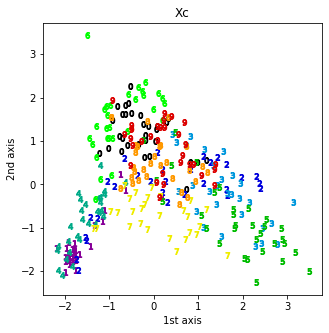

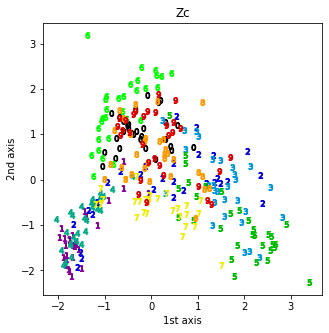

In [ ]:
Xc, Zc = cca.transform(X, Z)
plot_digits(Xc, y, title="Xc")
plot_digits(Zc, y, title="Zc")

<!-- ENG -->
　From the execution results, we can see that $X$ and $Z$ are projected into the same feature space, the corresponding $\boldsymbol{x}_i$ and $\boldsymbol{z}_i$ are close to each other</font>, and the same numbers are projected into similar locations. This result shows that CCA has produced a low-dimensional representation of the image with the upper and lower parts associated with it.

<!-- ENG -->
　Additionally, we created a post in Qiita (in Japanese), titled ["Book Recommendations on CCA"](https://qiita.com/yanagi3150/items/7c84f7d9200e57436879) . So refer to this post if you want to deepen your understanding of CCA.

---

<!-- ENG -->
##### Exercise DS6.3
　Let's check quantitatively that $X$ and $Z$ are associated in the low-dimensional representation obtained by CCA.
When $X$ and $Z$ are projected to **one dimension** using CCA, what is the correlation coefficient between the value obtained from $X$ and the value obtained from $Z$? Provide the answer using two decimal places.

---

<!-- ENG -->
### DS6.4.2 | Image recovery using CCA (Advanced)

　In Exercises in Fundamentals of Data Science, we reconstructed an image from multiple principal components obtained using PCA. In a similar way, let’s try to recover an image that has been reduced the dimensionality by using CCA.


In [ ]:
# prepare dataset
num_data = 300
d = datasets.load_digits()
D = d.data[:num_data]
y = d.target[:num_data]

X = D[:, :48] # 0...47  feature
Z = D[:, 48:] # 48...63 feature

# prepare one test image
image_index = 0
X_test = D[image_index, :48].reshape(1, -1)
Z_test = D[image_index, 48:].reshape(1, -1)


In [ ]:
# projection and inverse-projection by CCA
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=16, scale=True)
cca.fit(X, Z)
Xc, Zc = cca.transform(X, Z)

X_test_map, Z_test_map = cca.transform(X_test, Z_test)
X_recovered_from_X = cca.inverse_transform(X_test_map)
X_recovered_from_Z = cca.inverse_transform(Z_test_map)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:321: UserWarning: Y residual constant at iteration 14
  warnings.warn('Y residual constant at iteration %s' % k)


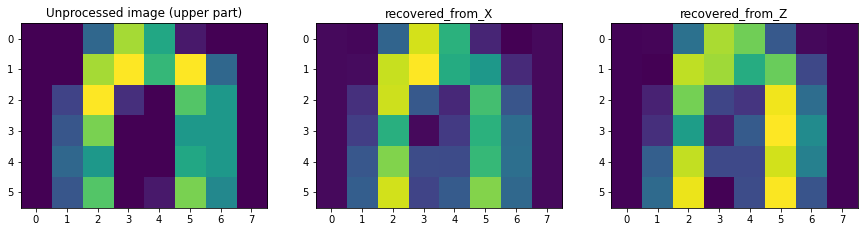

In [ ]:
# plot 3 images
X_test_image = X_test.reshape(6, 8)
X_recovered_from_X_image = X_recovered_from_X.reshape(6, 8)
X_recovered_from_Z_image = X_recovered_from_Z.reshape(6, 8)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_test_image)
plt.title("Unprocessed image (upper part)")

plt.subplot(1, 3, 2)
plt.imshow(X_recovered_from_X_image)
plt.title("recovered_from_X")

plt.subplot(1, 3, 3)
plt.imshow(X_recovered_from_Z_image)
plt.title("recovered_from_Z")

plt.show()

<!-- ENG -->
If you run the three cells above, you will get three images.

From left to right, the upper side of the original image, the upper side which is recovered by transforming and inverse transforming the upper side, and the upper side which is recovered by transforming and inverse transforming the lower side, respectively.

Let's try a few examples by changing `image_index` and `n_components`.
By associating the upper and lower sides of the image using CCA, it is now possible to recover the upper side from the lower side of the image with some accuracy.


<!-- ENG -->
## DS6.5 | Combining dimension reduction and classification prediction

　One way to use dimension reduction is to reduce the dimensionality of high-dimensional data first and then apply another machine learning method. The dimension reduction extracts the features that represent the data well and creates a model that has high generalization performance even for small data sets.

　Here, we will confirm how the prediction accuracy changes when **only 500 of the digits data sets are used as training data** and training is performed by lowering the dimensions using PCA.

In [ ]:
from sklearn import datasets
d = datasets.load_digits()
X = d.data
y = d.target

In [ ]:
from sklearn.model_selection import train_test_split

# Unlike the last time, use train_test_split() to split the data
# If an integer value is given to the argument train_size instead of a real number,
# only that number of data will be used as training data, and the rest will be used as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=0) 

print(X_train, y_train)

[[ 0.  0.  5. ...  8.  1.  0.]
 [ 0.  0.  9. ...  7.  0.  0.]
 [ 0.  0.  0. ... 16.  4.  0.]
 ...
 [ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 [ 0.  0.  6. ... 11.  0.  0.]] [0 9 6 9 8 4 5 8 1 6 3 0 4 6 1 8 3 4 7 1 0 7 9 2 7 2 1 6 9 3 1 3 2 4 3 4 3
 3 5 4 7 3 6 7 0 0 1 1 0 2 0 7 7 4 7 2 0 1 2 4 8 1 6 0 3 4 0 6 8 4 4 9 0 8
 4 6 8 7 8 2 8 1 6 6 9 5 3 8 5 1 3 3 1 8 8 3 0 4 1 7 2 7 4 0 4 2 7 7 9 1 9
 0 9 3 8 6 2 5 3 3 7 2 1 0 8 7 7 3 1 2 4 5 7 7 9 1 5 5 2 8 7 9 4 7 0 2 6 1
 3 1 3 7 3 6 7 1 6 6 1 0 6 9 7 7 4 4 9 1 5 1 1 7 2 6 6 4 3 1 0 5 3 9 5 8 1
 7 9 9 8 2 1 0 6 6 4 4 7 8 6 5 8 8 2 2 2 9 8 8 3 6 0 4 4 7 6 6 9 0 4 6 8 5
 1 9 9 3 1 6 5 9 7 3 4 4 2 4 4 9 2 9 9 7 2 3 3 3 7 2 7 8 1 0 5 6 6 8 0 7 0
 4 2 6 6 8 6 4 7 7 0 3 0 7 4 0 0 2 1 8 4 2 2 9 9 3 3 4 4 2 6 3 7 2 8 4 2 9
 5 1 9 0 9 7 2 6 2 1 6 9 9 3 8 3 6 2 2 4 9 3 4 6 8 6 1 7 4 1 4 7 0 1 5 6 2
 7 8 4 9 0 9 0 5 2 2 4 1 8 8 7 2 9 7 0 0 6 0 5 0 5 1 0 8 6 6 0 3 4 0 3 5 6
 9 8 4 8 5 2 7 5 5 1 1 8 9 0 3 4 9 2 9 3 1 7 5 4 9 5 7 7 7

<!-- ENG -->
　Let's start by building the PCA using only `X_train`. In the case of using PCA for subsequent machine learning, the value of `n_components` is often set to a larger value than for visualization.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train) 

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<!-- ENG -->
　Then, `X_train` and `X_test` are dimensionally reduced using PCA.

In [ ]:
new_X_train = pca.transform(X_train)
new_X_test  = pca.transform(X_test)

<!-- ENG -->
　Once you get to this point, the rest is just like normal machine learning. Let's use a decision tree with no restrictions especially on depth, etc.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# training
dt = DecisionTreeClassifier(random_state=0)
dt.fit(new_X_train, y_train)

# prediction 
y_pred = dt.predict(new_X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7987663839629915


<!-- ENG -->
　This PCA -> decision tree flow can also be done using `make_pipeline()`, which we learned in the Exercises in Fundamentals of Artificial Intelligence. Make sure that you get the same accuracy.

In [ ]:
from sklearn.pipeline import make_pipeline

# training
pca_dt = make_pipeline(
  PCA(n_components=10), 
  DecisionTreeClassifier(random_state=0)
)

pca_dt.fit(X_train, y_train)

# prediction 
y_pred = pca_dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7987663839629915


<!-- ENG -->
　Lastly, let's compare the accuracy to the test data when no dimension reduction is applied.

In [ ]:
# training
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# prediction
y_pred = dt.predict(X_test)

# evaluation
accuracy = (y_pred == y_test).mean()
print(accuracy)

0.7717810331534309


<!-- ENG -->
　Although only slightly, it was confirmed that the dimension reduction improved the accuracy for the test data.

---

<!-- ENG -->
##### Exercise DS6.4
　Vary the number of `n_components` from 1 to 10, and list the `n_components` that improve the prediction accuracy of the test data compared to the case without dimension reduction (specify `random_state=0` in the decision tree as in the code above).


---

<!-- ENG -->
##### Exercise DS6.5
　Regarding the results of Exercise DS6.4, discuss and explain why you think it happened using wording such as "cumulative contribution of PCA," "overfitting," "bias and variance," and "model complexity" as appropriate. If necessary, additional experiments can be conducted by limiting the depth of the decision tree.

---

<!-- ENG -->

# Report submissions (FY2021)



<!-- ENG -->
## How to submit reports

　The report should be submitted **via T2SCHOLA**. **The deadline is the start of the next Exercise in the Fundamentals of Data Science**. Be sure to submit your work with plenty of time to spare as the form cannot receive after the deadline.


<!-- ENG -->
## Answer Sheet Template

```
Student ID number:
Name:

Exercise DS6.1
[ A ]: 
[ B ]:  

Exercise DS6.2
(Write your answer)

Exercise DS6.3
Correlation coefficient:

Exercise DS6.4
(Write your answer)

Exercise DS6.5
(Write your answer)
```